<a href="https://colab.research.google.com/github/TerriDonut/Yandex-educational-projects/blob/main/HR_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

____    
    
**Сборный прокт 2**
_____
**Описание проекта**

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.

Компания предоставила данные с характеристиками своих сотрудников. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.
_____
**Цель проекта.**
    
Оптимизировать с помощью машинного обучения быстрые и точные ответы на вопросы бизнеса.

**Задачи проекта.**

- Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

- Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.
______

**Исходные данные.**

**Задача 1: предсказание уровня удовлетворённости сотрудника**

Тренировочная выборка:
*train_job_satisfaction_rate.csv*

Входные признаки тестовой выборки:
*test_features.csv*

Целевой признак тестовой выборки:
*test_target_job_satisfaction_rate.csv*

**Задача 2: предсказание увольнения сотрудника из компании**

Тренировочная выборка:
*train_quit.csv*

Входные признаки тестовой выборки те же, что и в прошлой задаче:
*test_features.csv*

Целевой признак тестовой выборки:
*test_target_quit.csv*
____
**Содержание проекта.**

**Задача 1: предсказание уровня удовлетворённости сотрудника**

- ***Шаг 1. Загрузка данных:***
** [Загрузка библиотек.](#1-bullet)
** [Изученеие файлов с данными, получение общей информации.](#2-bullet)

- ***Шаг 2. Предобработка данных:***
** [Поиск и устранение дублей.](#3-bullet)

- ***Шаг 3. Исследовательский анализ данных:***
** [Гистограмма и ящик для количественных данных](#4-bullet)
** [Оценка категориальных значений](#5-bullet)

- ***Шаг 4. Подготовка данных***
** [Построение пайплайна предобработки](#6-bullet)

- ***Шаг 5. Обучение моделей***
** [Вывод SMAPE метрик](#7-bullet)

***Шаг 6. Оформление выводов***

**Задача 2: предсказание увольнения сотрудника из компании**
- **Шаг 1. Загрузка данных**
** [Изученеие файлов с данными, получение общей информации](#8-bullet)

- **Шаг 2. Предобработка данных**
** [Поиск и устранение дублей](#9-bullet)

- **Шаг 3. Исследовательский анализ данных**
** [Построение корреляционной матрицы](#10-bullet)
** [Построение классовой корреляционной матрицы](#11-bullet)
** [Проверка утверждений](#12-bullet)

- **Шаг 4. Добавление нового входного признака**

- **Шаг 5. Подготовка данных**

- **Шаг 6. Обучение модели**

- **Шаг 7. Выводы**

***Общий вывод***



#Задача 1: предсказание уровня удовлетворённости сотрудника

##Шаг 1. Загрузка данных:

### Загрузка библиотек
<a id='1-bullet'></a>

In [ ]:
#Установка нужных бибилотек
import sys
!"{sys.executable}" -m pip install phik -q
!"{sys.executable}" -m pip install imbalanced-learn -q


#Импорты базовых библиотек (не все понадобятся, но удалять не буду)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

from imblearn.over_sampling import RandomOverSampler

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from warnings import simplefilter

from phik import phik_matrix
from phik.report import plot_correlation_matrix

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

### Изученеие файлов с данными, получение общей информации
<a id='2-bullet'></a>

In [ ]:
try:
    df_train = pd.read_csv('/content/train_job_satisfaction_rate.csv')#, sep=',')
    df_test = pd.read_csv('/content/test_features.csv')#, sep=',')
    df_target = pd.read_csv('/content/test_target_job_satisfaction_rate.csv')#, sep=',')
except:
    df_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')#, sep=',')
    df_test = pd.read_csv('/datasets/test_features.csv')#, sep=',')
    df_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')#, sep=',')

#Просмотр
display(df_train.info())
display(df_train.head(5))

display(df_test.info())
display(df_test.head(5))

display(df_target.info())
(df_target.head(5))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<b>Выводы:</b>
    
- Заметно несоответстиве индексации в *df_test* и *df_target*

- Данные в столбцах соответствуют своим типам

- Названия столбцов в "змеином" стиле

- Присутствуют пропуски в данных

- Дальнейший анализ и предобработка в следующих шагах


##Шаг 2. Предобработка данных

### Поиск и устранение дублей
<a id='3-bullet'></a>

In [ ]:
#Функция для отбора категорий в списки
def select_type_list(df, column_type):
    return df.select_dtypes(include=column_type).columns.tolist()

#Создание списка категориальных столбцов
cat_train = select_type_list(df_train, ['object'])
cat_test = select_type_list(df_test, ['object'])

#Функция по поиску дублей
def search_duplicates(df, categorical_traits):
    print('Количество дубликатов в столбцах:')
    display(df.apply(lambda col: col.duplicated().sum()))

    print('Количество дубликатов в строках:')
    display(df.duplicated().sum())

    for trait in categorical_traits:
        print(f"Уникальные значения для {trait}: {df[trait].unique()}")


display(search_duplicates(df_train, cat_train))
search_duplicates(df_test, cat_test)

#Переименование пробелов в пропуски
df_test.replace(' ', np.nan, inplace=True)

#Заполнение пропусков в категориальных значениях модой
for col in df_train[cat_train]:
  df_train[col].fillna(df_train[col].mode()[0], inplace=True)

Количество дубликатов в столбцах:


id                          0
dept                     3994
level                    3996
workload                 3997
employment_years         3990
last_year_promo          3998
last_year_violations     3998
supervisor_evaluation    3995
salary                   3932
job_satisfaction_rate    3902
dtype: int64

Количество дубликатов в строках:


0

Уникальные значения для dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Уникальные значения для level: ['junior' 'middle' 'sinior' nan]
Уникальные значения для workload: ['medium' 'high' 'low']
Уникальные значения для last_year_promo: ['no' 'yes']
Уникальные значения для last_year_violations: ['no' 'yes']


None

Количество дубликатов в столбцах:


id                          0
dept                     1993
level                    1996
workload                 1996
employment_years         1990
last_year_promo          1998
last_year_violations     1998
supervisor_evaluation    1995
salary                   1934
dtype: int64

Количество дубликатов в строках:


0

Уникальные значения для dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уникальные значения для level: ['junior' 'middle' 'sinior' nan]
Уникальные значения для workload: ['medium' 'low' 'high' ' ']
Уникальные значения для last_year_promo: ['no' 'yes']
Уникальные значения для last_year_violations: ['no' 'yes']


In [ ]:
#Приведение к единому порядку
df1_indexed = df_target.set_index('id')
df2_indexed = df_test.set_index('id')
df_test = df2_indexed.reindex(df1_indexed.index)
df_test.reset_index(inplace=True)

<b>Комментарий к предобработке</b>

Строки не дублируются, а дубли присутствующие в столбцах уместны, неявные пропуски устранил (возможно и не стоило трогать тестовую выборку, но значения " " логично равны "nan")

##Шаг 3. Исследовательский анализ данных

### Гистограмма и ящик для количественных данных
<a id='4-bullet'></a>

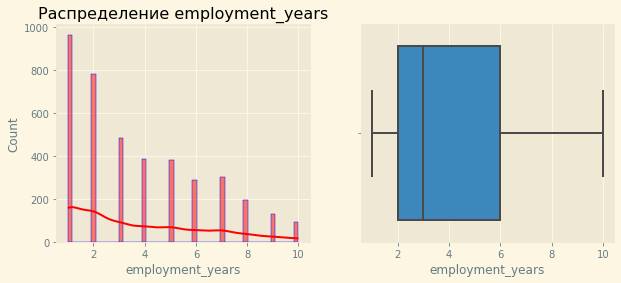

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

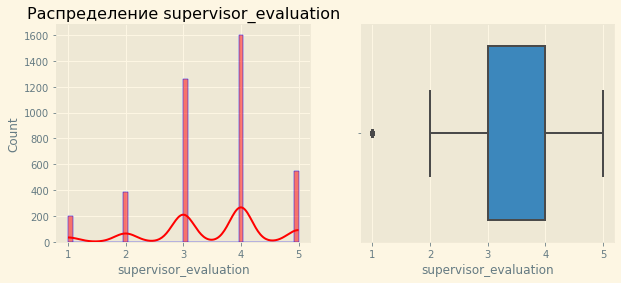

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

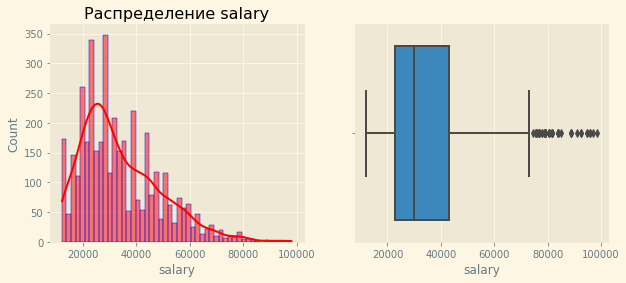

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

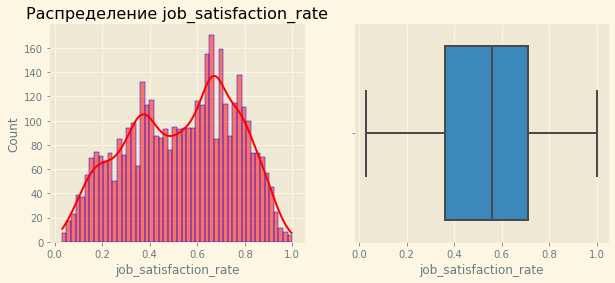

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

In [ ]:
plt.style.use('Solarize_Light2')

#Создаю список интервальных значений
int_col = select_type_list(df_train, ['int', 'float'])
#Удалю из списка id
int_col.remove('id')

for sign in int_col:
    plt.figure(figsize=(10,  4))

    #Гистограмма
    plt.subplot(1,  2,  1)  # Row  1, Column  2, Index  1
    sns.histplot(df_train[sign], kde=True, color='red', edgecolor='blue', bins=50)
    plt.title(f'Распределение {sign}')

    #Построение ящика
    plt.subplot(1,  2,  2)
    sns.boxplot(df_train[sign], orient="h")
    plt.setp(plt.gca(),  'yticklabels', [])

    plt.show()
    display(df_train[sign].describe())


In [ ]:
#Словарь для сохранения результатов тестов
results = {}

#Функция по оценке нормальности распределения
for col in df_train[int_col]:
    result = stats.shapiro(df_train[col])
    results[col] = {'statistic': result[0], 'p_value': result[1]}

#Печать результатов тста
for column, result in results.items():
    print(f'Столбеу: {column}')
    print(f"Статистика: {result['statistic']}")
    print(f"P-значение: {result['p_value']}")
    print('\n')

Столбеу: employment_years
Статистика: 0.8869529962539673
P-значение: 0.0


Столбеу: supervisor_evaluation
Статистика: 0.8860812187194824
P-значение: 0.0


Столбеу: salary
Статистика: 0.9387514591217041
P-значение: 8.396205410765251e-38


Столбеу: job_satisfaction_rate
Статистика: 0.9708877801895142
P-значение: 8.90544324791322e-28




### Оценка категориальных значений
<a id='5-bullet'></a>

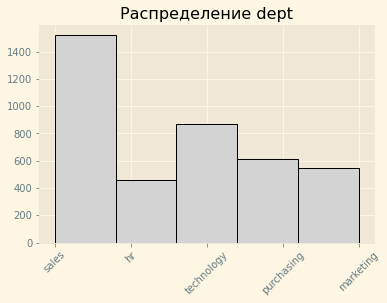

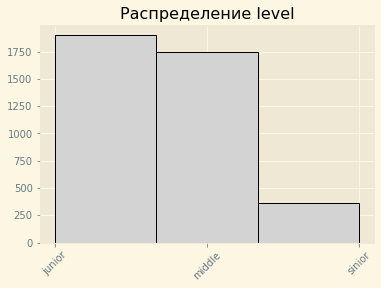

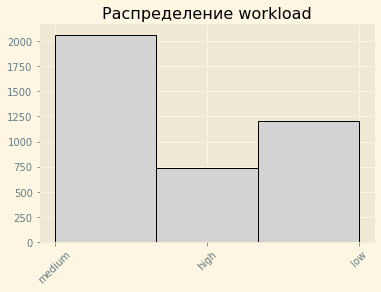

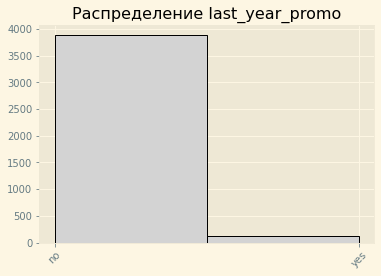

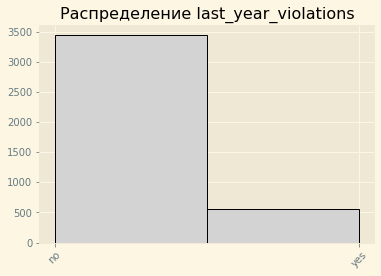

In [ ]:
#Функция для визуализации категориальных значений
for sign in cat_train:
    unique_values = df_train[sign].unique()
    num_bins = len(unique_values)

    plt.figure(figsize=(6,  4))
    plt.hist(df_train[sign], bins=num_bins, align='mid', edgecolor='black', color='lightgray')
    plt.xticks(range(num_bins), unique_values, rotation=45)
    plt.title(f'Распределение {sign}')
    plt.show()

In [ ]:
#Небольшое исследования для оправдания выбросов
study = df_train[df_train['salary'] > 70000]
study['level'].value_counts()

sinior    85
Name: level, dtype: int64

<b>Комментарий к исследовательскому анализу</b>

- Типы данных во всех столбцах соответствующие значениям

- Количественные данные распределены вполне нормально, присутствуют зарплатные выбросы, но это обусловлено ЗП сотрудников уровня *sinior*, поэтому уместно оставить их

- Категориальные признаки имеют явный дисбаланс классов, в последующем устраню это сэмплированием

В итоге большинство делаю вывод о том, что большинство сотрудников работает в среднем около 3 лет, зачастую в продажах и занимает низкий или средний уровень в иерархии, имеет среднюю загруженность и редко идёт на повышение или нарушения условий трудового договора

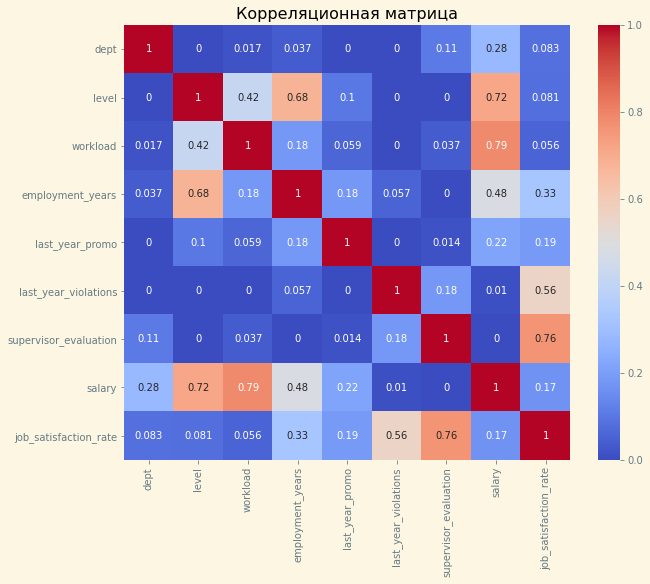

In [ ]:
df_train = df_train.drop('id', axis=1)

#Построение кор. матрицы
plt.figure(figsize=(10, 8));
sns.heatmap(df_train.phik_matrix(interval_cols=int_col), annot=True, cmap='coolwarm');
plt.title('Корреляционная матрица');
plt.show();

##Шаг 4. Подготовка данных

In [ ]:
#Подготовка списков
int_col.remove('job_satisfaction_rate')
cat_train.remove('dept')
cat_train.remove('level')
cat_train.remove('workload')

### Построение пайплайна предобработки
<a id='6-bullet'></a>

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

#Списки с названиями признаков
ohe_columns = cat_train
ord_columns = ['dept', 'level', 'workload']
num_columns = int_col

#Общий пайплайн предобработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ohe_columns),
        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ord_columns)
])

##Шаг 5. Обучение моделей

In [ ]:
#Определение пайплайнов каждой модели
pipe_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

#Параметры для DecisionTreeClassifier
param_grid = [
    {
        'model__min_samples_leaf': [2, 3, 4, 5],
        'model__min_samples_split': [2, 3, 4, 5]
    }
]

#Функция для вычисления SMAPE
def smape(y_true, y_pred):
    return  100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

#Маркер выбирающий минимальные значения
smape_scorer = make_scorer(smape, greater_is_better=False)

#GridSearchCV для оптимизации параметров дерева
grid_search = GridSearchCV(pipe_tree, param_grid, cv=10, scoring=smape_scorer, n_jobs=-1)

#Обучение моделей
grid_search.fit(df_test, df_target['job_satisfaction_rate'])
pipe_lr.fit(df_test, df_target['job_satisfaction_rate'])



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['dept', 'level',
                                                   'workload'])])),
                ('model', LinearRegression())])

### Вывод *SMAPE* метрик
<a id='7-bullet'></a>

In [ ]:
#Лучшее дерево
dt = grid_search.best_estimator_

#Прогнозы моделей
y_pred_lr = pipe_lr.predict(df_test)
y_pred_dt = dt.predict(df_test)

#SMAPE для каждой модели
smape_lr = smape(df_target['job_satisfaction_rate'], y_pred_lr)
smape_dt = smape(df_target['job_satisfaction_rate'], y_pred_dt)

print(f"SMAPE для линейной модели: {smape_lr}")
print(f"SMAPE для модели дерева решений: {smape_dt}")

SMAPE для линейной модели: 24.82502311044449
SMAPE для модели дерева решений: 9.56568252728369


## Шаг 6. Оформление выводов

<b>Вывод</b>

В целом, линейная модель более простая и быстрая в обучении, но дерево решений обеспечивает более высокую точность прогнозирования благодаря своей способности работы с нелинейной зависимостью в данных, а так-же возможностью настройки гиперпараметров, упрощающих отладку модели.

#Задача 2: предсказание увольнения сотрудника из компании

##Шаг 1. Загрузка данных

### Изученеие файлов с данными, получение общей информации
<a id='8-bullet'></a>

In [ ]:
try:
    df_train2 = pd.read_csv('/content/train_quit.csv')#, sep=',')
    df_target2 = pd.read_csv('/content/test_target_quit.csv')#, sep=',')
except:
    df_train2 = pd.read_csv('/datasets/train_quit.csv')#, sep=',')
    df_target2 = pd.read_csv('/datasets/test_target_quit.csv')#, sep=',')

display(df_train2.info())
display(df_train2.head(5))

display(df_target2.info())
(df_target2.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


## Шаг 2. Предобработка данных

### Поиск и устранение дублей
<a id='9-bullet'></a>

In [ ]:
cat_train2 = select_type_list(df_train2, ['object'])
display(search_duplicates(df_train2, cat_train2))

Количество дубликатов в столбцах:


id                          0
dept                     3995
level                    3997
workload                 3997
employment_years         3990
last_year_promo          3998
last_year_violations     3998
supervisor_evaluation    3995
salary                   3931
quit                     3998
dtype: int64

Количество дубликатов в строках:


0

Уникальные значения для dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уникальные значения для level: ['middle' 'junior' 'sinior']
Уникальные значения для workload: ['high' 'medium' 'low']
Уникальные значения для last_year_promo: ['no' 'yes']
Уникальные значения для last_year_violations: ['no' 'yes']
Уникальные значения для quit: ['no' 'yes']


None

In [ ]:
#Приведение к одному порядку
df1_indexed2 = df_target2.set_index('id')
df_test = df2_indexed.reindex(df1_indexed2.index)
df_test.reset_index(inplace=True)

<b>Комментарий к предобработке</b>

Неявные дубли отсутствуют, заполнение пропусков выполню на этапе подготовки данных

## Шаг 3. Исследовательский анализ данных

### Построение корреляционной матрицы
<a id='10-bullet'></a>

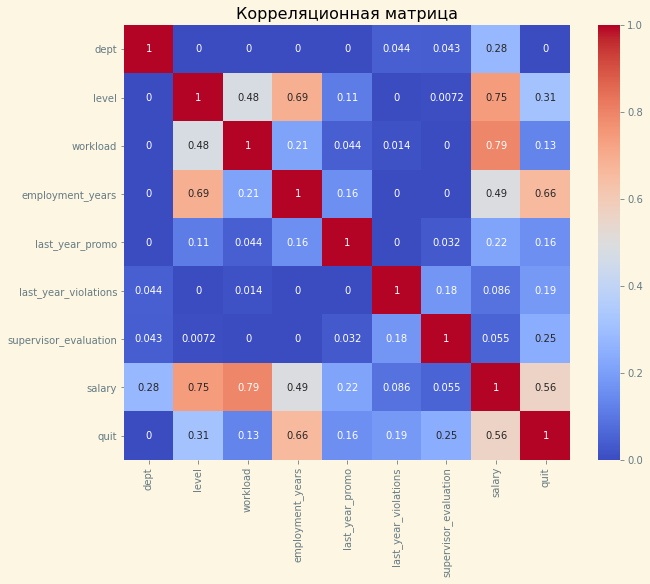

In [ ]:
#Создаю список интервальных значений
int_col2 = select_type_list(df_train2, ['int', 'float'])
#Удалю из датафрейма id
df_train2.drop('id', axis=1, inplace=True)

#Построение кор. матрицы
plt.figure(figsize=(10, 8));
sns.heatmap(df_train2.phik_matrix(interval_cols=int_col2), annot=True, cmap='coolwarm');
plt.title('Корреляционная матрица');
plt.show();

### Построение классовой корреляционной матрицы  
<a id='11-bullet'></a>

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


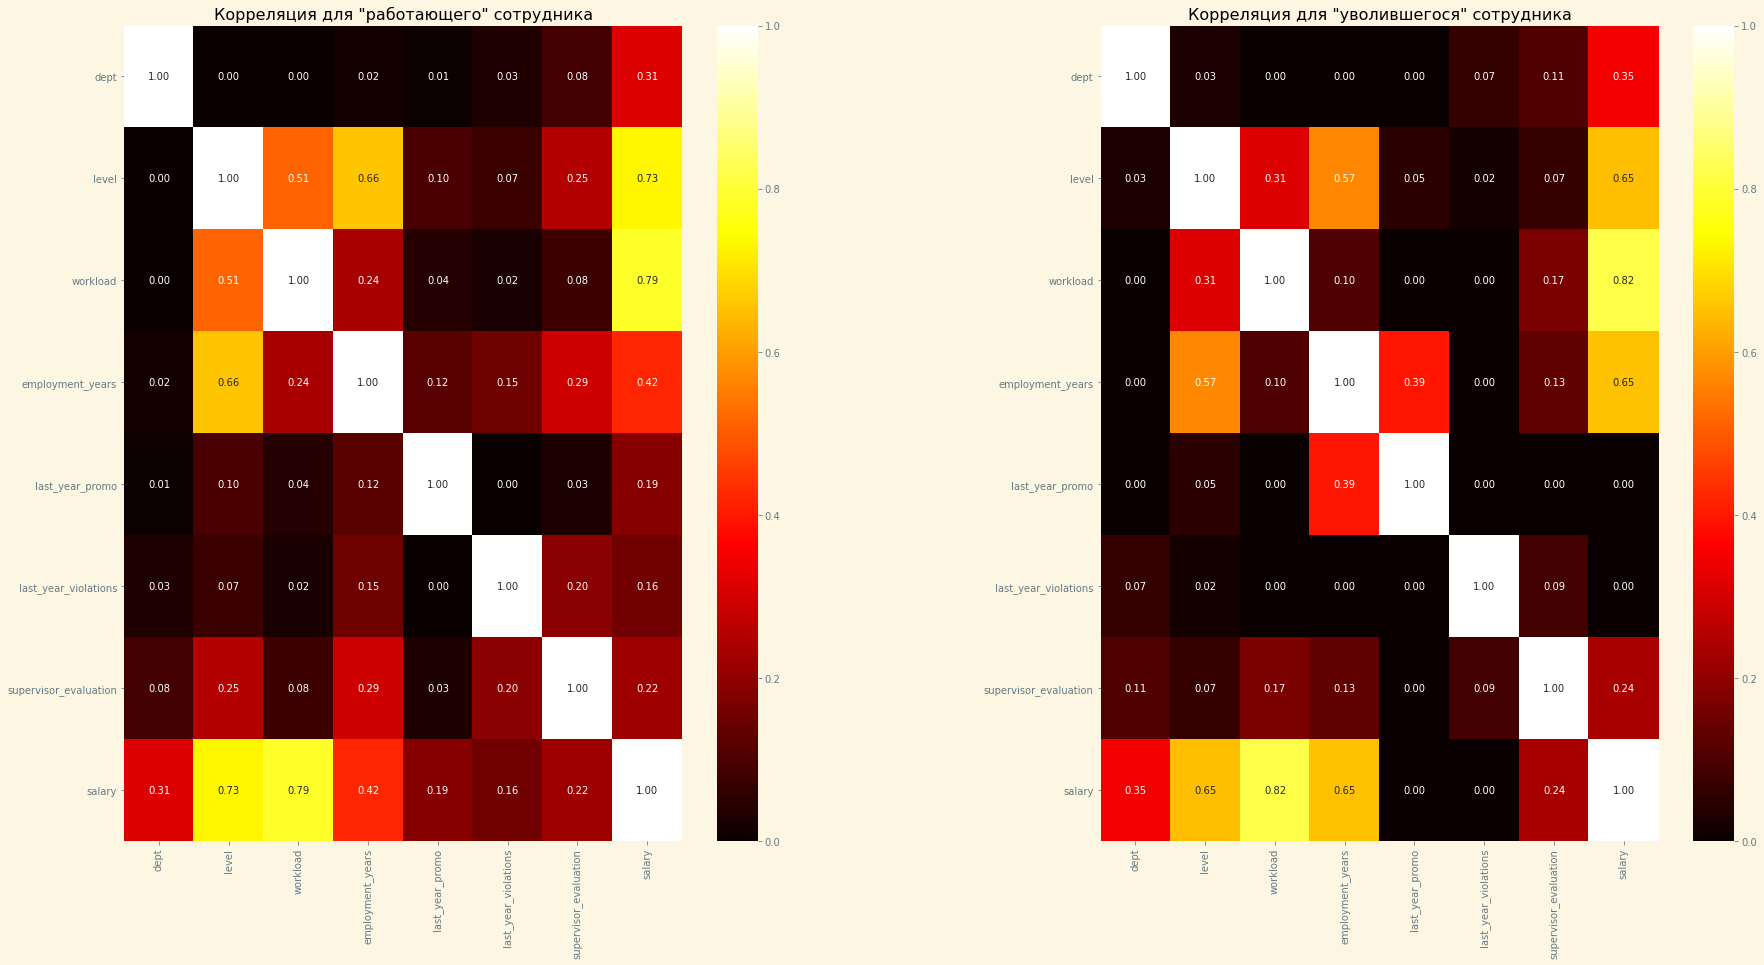

In [ ]:
#Фильтрация для оценки влияния признаков на каждый целевой класс
df_good = df_train2[df_train2['quit'] == 'no']
df_bad = df_train2[df_train2['quit'] == 'yes']

#Построение кор. матрицы для каждого класса целевой переменной
plt.figure(figsize=(30, 15));
plt.subplot(1, 2, 1);
sns.heatmap(df_good.phik_matrix(interval_cols=int_col2),
            cmap='hot', annot=True, fmt=".2f");
plt.title('Корреляция для "работающего" сотрудника');
plt.subplot(1, 2, 2);
sns.heatmap(df_bad.phik_matrix(interval_cols=int_col2),
            cmap='hot', annot=True, fmt=".2f");
plt.title('Корреляция для "уволившегося" сотрудника');
plt.subplots_adjust(wspace=0.4);
plt.show();

<b>Комментарий к матрицам</b>

- Наибольшее влияние входные признаки оказывают на работающих сотрудников
- Корреляции многих признаков с основным небольшие, в дальнейшем удалю их для оптимизации

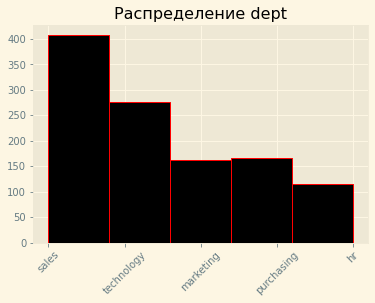

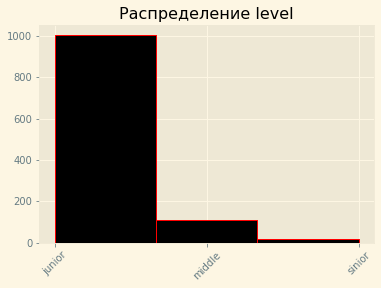

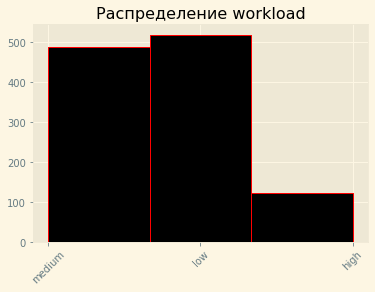

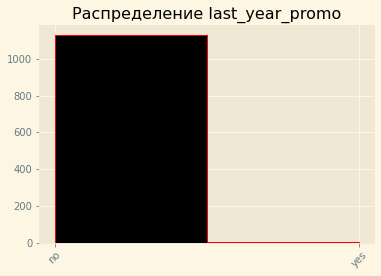

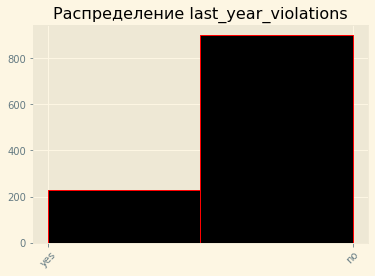

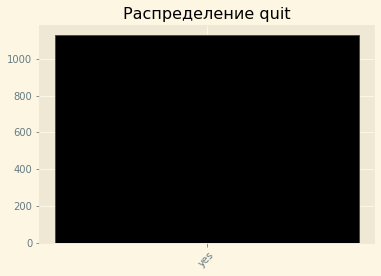

In [ ]:
#Функция для визуализации категориальных значений
for sign in cat_train2:
    unique_values = df_bad[sign].unique()
    num_bins = len(unique_values)

    plt.figure(figsize=(6,  4))
    plt.hist(df_bad[sign], bins=num_bins, align='mid', edgecolor='red', color='black')
    plt.xticks(range(num_bins), unique_values, rotation=45)
    plt.title(f'Распределение {sign}')
    plt.show()

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64
count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64


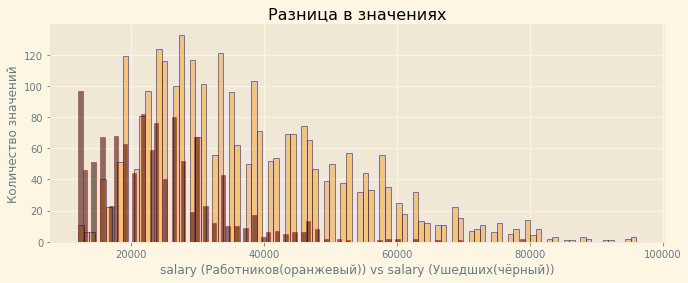

In [ ]:
#Функция для оценки зарплат сотрудников
def viz_mount(df1, df2, column_name):
    print(df1[column_name].describe())
    print(df2[column_name].describe())

    plt.figure(figsize=(11,  4))
    plt.hist(df1[column_name], alpha=0.5, color='orange', edgecolor='blue', bins=100)
    plt.hist(df2[column_name], alpha=0.5, color='black', edgecolor='red', bins=100)
    plt.title('Разница в значениях')
    plt.xlabel(f'{column_name} (Работников(оранжевый)) vs {column_name} (Ушедших(чёрный))')
    plt.ylabel('Количество значений')
    plt.show()

#График зарплатной разницы
viz_mount(df_good, df_bad, 'salary')



In [ ]:
sales_ratio = df_bad['dept'].value_counts()['sales'] / df_train2['dept'].value_counts()['sales']

print('Доля ушедших сотрудников в отделе продаж:', sales_ratio.round(2))


Доля ушедших сотрудников в отделе продаж: 0.28


<b>Портрет</b>

Изучив данные можно составить следующий портрет уволившегося сотрудника:

В большинстве случаев это сотрудник отдела продаж, в статусе новичка, с небольшой рабочей нагрузкой, входящий в сегмент самых низких зарплатных значений  
Доля ушедших сотрудников в отделе продаж: 0.28%

Так-же в зоне риска новички в отделе разработки(технологии)

### Проверка утверждений
<a id='12-bullet'></a>

In [ ]:
#Подготовка к прогнозу
pred_col = cat_train2 + int_col2
pred_col.remove('id')
pred_col.remove('quit')


#Предсказание и добавление нового признака в тренировочную выборку
pred = dt.predict(df_train2[pred_col])
pred_df = pd.DataFrame(pred, columns=['job_satisfaction_rate_pred'])

df_train2 = pd.concat([df_train2, pred_df], axis=1)

In [ ]:
pred_df

,job_satisfaction_rate_pred
0,0.643333
1,0.810000
2,0.426667
3,0.376667
4,0.686667
...,...
3995,0.522000
3996,0.846667
3997,0.550000
3998,0.517500


count    2872.000000
mean        0.594086
std         0.201500
min         0.053333
25%         0.453333
50%         0.652500
75%         0.770000
max         1.000000
Name: job_satisfaction_rate_pred, dtype: float64
count    1128.000000
mean        0.407363
std         0.188547
min         0.066667
25%         0.283333
50%         0.353333
75%         0.541250
max         0.883333
Name: job_satisfaction_rate_pred, dtype: float64


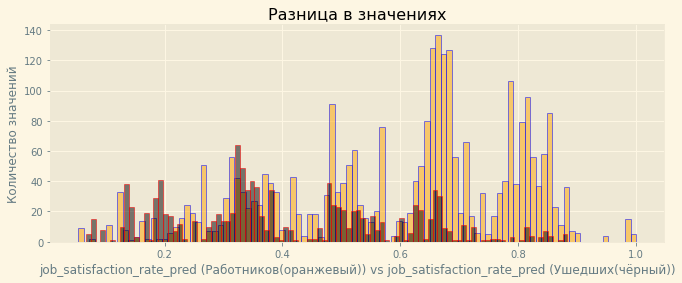

In [ ]:
#Повторная фильтрация и визуализация
df_good = df_train2[df_train2['quit'] == 'no']
df_bad = df_train2[df_train2['quit'] == 'yes']

viz_mount(df_good, df_bad, 'job_satisfaction_rate_pred')

<b>Вывод</b>

Утверждение аналитиков, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник, уместно.

Оно подкрепляется данными визуализации и показателями ниже 0.5 в 75% случаев

## Шаг 4. Добавление нового входного признака

In [ ]:
#Добавление предсказаний к тестовой выборке
pred_test = dt.predict(df_test[pred_col])
pred_df_test = pd.DataFrame(pred_test, columns=['job_satisfaction_rate_pred'])

df_test = pd.concat([df_test, pred_df_test], axis=1)

## Шаг 5. Подготовка данных

In [ ]:
#Удаление тех самых, плохо коррелирующих признаков
df_test = df_test.drop(['last_year_promo', 'last_year_violations', 'supervisor_evaluation'], axis=1)

#Новые категориальные и количественные списки
int_col2 = select_type_list(df_test, ['int', 'float'])
cat_train2 = select_type_list(df_test, ['object'])

In [ ]:
#Подготовка списков
cat_train2.remove('dept')
cat_train2.remove('level')
cat_train2.remove('workload')

In [ ]:
#Списки с названиями признаков
ohe_columns2 = cat_train2
num_columns2 = int_col2

#Пайплайн предобработки
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns2),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), ohe_columns2),
        ('ord', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ord_columns)
])

## Шаг 6. Обучение модели

In [ ]:
#Пайплайн для преобразование данных и обозначения моделей
pipe_final = Pipeline([
    ('preprocessor', preprocessor2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


#Параметры для моделей
param_grid = [
    #Словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
    },

    #Словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'models__metric': ['euclidean', 'manhattan', 'minkowski'],
    },

    #Словарь для SVC модели
    {
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }
]

grid_search2 = GridSearchCV(pipe_final, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

#Сэмплер
sampler = RandomOverSampler(random_state=RANDOM_STATE)

#Устранение дисбаланса классов
X_train_sampled, y_train_sampled = sampler.fit_resample(df_test, df_target2['quit'])

#Обучение моделей
grid_search2.fit(X_train_sampled, y_train_sampled)

#Вывод лучшей модели и метрик
print('Лучшая модель и её параметры:\n\n', grid_search2.best_estimator_)
print ('Метрика лучшей модели на тестовой выборке:', grid_search2.best_score_)


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['id', 'employment_years',
                                                   'salary',
                                                   'job_satisfaction_rate_pred']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  []),
                                                 ('ord',


## Шаг 7. Выводы

<b>KNN - Лучшая модель</b>

KNeighborsClassifier или метод ближайших соседей оказался наилучшим по ряду причин:

- KNN не делает предположений о распределенных данных, что особенно полезно, этом случае, ведь данные содержат выбросы от которых нельзя отказаться

- Модель адаптивна и подходит для классификации или регрессии, KNN наблюдая все значения в наборе данных классифицирует новые значения на основе их схожести с уже классифицированными наблюдениями, что дополнительно повышает точность прогноза

# Общий вывод

---
**Задачи проекта**

- Построена модель способная предсказывать уровень удовлетворенности сотрудника
- Построена модель, которая на основе данных предсказывыает то, что сотрудник уволится из компании.

---
**В ходе выполнения проекта было выполнено:**
- Загрузка и изучение данных
- Предобработка и исследовательский анализ
- Проверка утверждений
- Подготовка данных к обучению
- Обучение и настройка моделей для решения задач проекта
---
**Итоги:**

Рассматривая наибольший сегмент увольнений, стоит задуматься над бонусами или мероприятиями для упрощения адаптации новичков

Из-за специфики работы в продажах проводить более углубленный подбор персонала (Морально не всем подходит, но зачастую только во время рабочего процесса это осознают, и соответственно уходят)

Так-же исходя из количества поваышений внутри компании, поднять на рассмотрение вопрос о "взращивании" своих специалистов для повышения уровня (судя по предоставленным данным, увольнений после повышение ещё не наблюдалось), особенно для сотрудников с высокой степенью похвалы руководства и низким уровнем удовлетворения работой